Importing Libraries

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense

Importing Raw Data

In [60]:
data_dir = '/content/drive/MyDrive/Water_quality/Colour'

Defining dataset 

In [61]:
batch_size = 32
img_height = 180
img_width = 180

Training and Testing dataset generation

In [62]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.25,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.25,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 850 files belonging to 6 classes.
Using 638 files for training.
Found 850 files belonging to 6 classes.
Using 212 files for validation.


Label generation

In [63]:
class_names = train_ds.class_names
print(class_names)

['Black', 'Blue', 'Brown', 'Green', 'Red', 'White']


Auto-tune and Data agumentation

In [64]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (img_height, img_width,3)),
    layers.experimental.preprocessing.RandomContrast(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Defining model

In [78]:
num_classes = 6

my_model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(num_classes)

])

Model Compilation and Summary

In [66]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 45, 45, 64)       

Training

In [67]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
20/20 [==============================] - 37s 1s/step - loss: 1.5564 - accuracy: 0.4930 - val_loss: 0.6403 - val_accuracy: 0.7736
Epoch 2/20
20/20 [==============================] - 25s 1s/step - loss: 0.5283 - accuracy: 0.8274 - val_loss: 0.4432 - val_accuracy: 0.8396
Epoch 3/20
20/20 [==============================] - 25s 1s/step - loss: 0.4780 - accuracy: 0.8310 - val_loss: 0.3844 - val_accuracy: 0.8491
Epoch 4/20
20/20 [==============================] - 25s 1s/step - loss: 0.3239 - accuracy: 0.8658 - val_loss: 0.3415 - val_accuracy: 0.8774
Epoch 5/20
20/20 [==============================] - 24s 1s/step - loss: 0.3462 - accuracy: 0.8740 - val_loss: 0.3367 - val_accuracy: 0.8868
Epoch 6/20
20/20 [==============================] - 24s 1s/step - loss: 0.3303 - accuracy: 0.8692 - val_loss: 0.3177 - val_accuracy: 0.9104
Epoch 7/20
20/20 [==============================] - 24s 1s/step - loss: 0.2617 - accuracy: 0.8870 - val_loss: 0.2840 - val_accuracy: 0.8821
Epoch 8/20
20/20 [==

Visualize training results

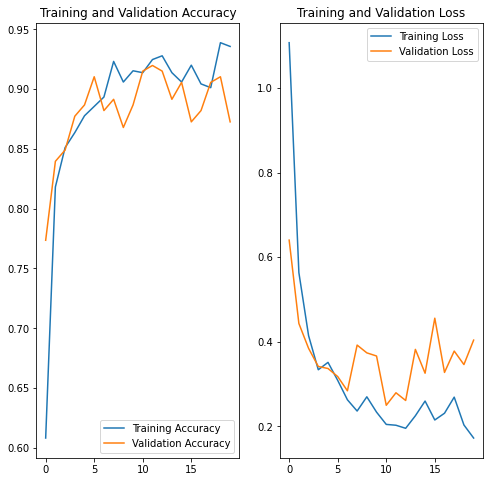

88.64420056343079
88.27830195426941
0.3129306510090828
0.36442168429493904


In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

final_acc = sum(acc)/0.20
final_val_acc = sum(val_acc)/0.20
final_loss = sum(loss)/20
final_val_loss = sum(val_loss)/20

print(final_acc)
print(final_val_acc)
print(final_loss)
print(final_val_loss)

In [81]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Water_quality/Colour_model')

my_model = tf.keras.models.load_model('/content/drive/MyDrive/Water_quality/Colour_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Water_quality/Colour_model/assets


Prediction

In [82]:
img_path = '/content/red.jfif'
img = keras.preprocessing.image.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

predicted_op = str(class_names[np.argmax(score)])
if predicted_op == 'Black':
    print("It might contain traces of : black ink")
elif predicted_op == 'Blue':
    print("It might contain traces of : copper sluphate")
elif predicted_op == 'Brown':
    print("It might contain traces of : mud")
elif predicted_op == 'Green':
    print("It might contain traces of : algae")
elif predicted_op == 'Red':
    print("It might contain traces of : rust")
elif predicted_op == 'White':
    print("It might contain traces of : salt")


This image most likely belongs to Red with a 100.00 percent confidence.
It might contain traces of : rust
